# 2018 Season Retrospective

In [93]:
import pandas as pd
import numpy as np

data = pd.read_csv("../../data/processed/data.csv")
data = data[data.year == 2018.0]

data["proj_avg"] = data[["pts_cbs", "pts_nfl", "pts_fox"]].mean(axis=1)
data["proj_avg_ppr"] = data[["pts_ppr_cbs", "pts_espn"]].mean(axis=1)

pos = ["QB", "RB", "WR", "TE"]
POS = [data[data.pos == p] for p in pos]

ROS = [12, 36, 36, 12]

for i, p in enumerate(pos):
    print(p, len(POS[i]))

data.head()

QB 80
RB 155
WR 209
TE 122


,name,pos,year,madden_ovr,pts_cbs,pts_ppr_cbs,pts_nfl,pts_espn,pts_fox,pts_yahoo,pts,pts_ppr,proj_avg,proj_avg_ppr
5938,aaron_rodgers,QB,2018.0,99.0,361.0,347.0,328.33,313.3,283.2,NaN,313.0,312.6,324.176667,330.15
5939,deshaun_watson,QB,2018.0,82.0,357.0,341.0,334.74,274.6,NaN,NaN,332.0,331.7,345.870000,307.80
5940,tom_brady,QB,2018.0,99.0,349.0,339.0,312.20,313.9,218.3,NaN,280.0,281.3,293.166667,326.45
5941,russell_wilson,QB,2018.0,92.0,336.0,318.0,303.58,289.3,325.2,NaN,298.0,299.4,321.593333,303.65
5942,andrew_luck,QB,2018.0,87.0,331.0,315.0,300.65,284.4,274.6,NaN,327.0,327.9,302.083333,299.70


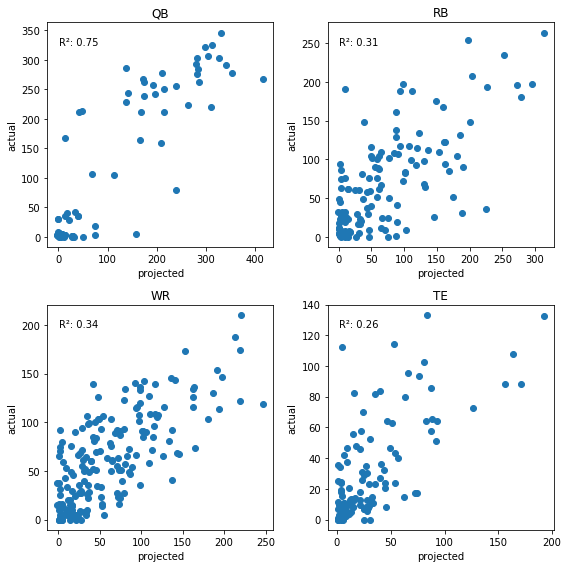

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(8,8))
for i, p in enumerate(POS):
    plt.subplot(int(f"22{i+1}"))
    plt.scatter(p.pts, p.proj_avg)
    plt.title(pos[i])
    plt.xlabel("projected")
    plt.ylabel("actual")
    plt.tight_layout()
    
    p_nan = p.dropna(subset=["proj_avg", "pts"])
    
    results = r2_score(p_nan.proj_avg, p_nan.pts)
    r2 = f"R²: {round(results, 2)}"
    plt.text(0.05, 0.9, r2, transform=plt.gca().transAxes)

In [75]:
from sklearn.metrics import r2_score
import pandas as pd

rows = []
for i, p in enumerate(POS):
    results = {"pos": pos[i]}
    for src in ["pts_cbs", "pts_nfl", "pts_fox"]:
        p_nan = p.dropna(subset=["pts", src])
        p_nan = p_nan.sort_values("proj_avg", ascending=False)
        p_nan = p_nan[:ROS[i]]
        r2 = r2_score(p_nan.pts, p_nan[src])
        results[src.replace("pts_", "")] = r2
    rows.append(results)

df = pd.DataFrame(rows)
df = df.set_index("pos")
df.head()
    

,cbs,fox,nfl
pos,,,
QB,-0.363878,-0.083364,0.107059
RB,0.487192,-0.705571,0.137415
WR,0.363616,-0.453998,0.374901
TE,0.097272,-0.205686,-0.054635
